In [2]:
# Importing standard Qiskit libraries
import numpy as np
import math
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram

In [3]:
#Call Aer's qasm_simulator
simulator = QasmSimulator()

#######For 001 == 01

# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(3,3)



###Initialize the in zero Q-State
circuit.reset(0)
circuit.reset(1)
circuit.reset(2)

#########Following build are 
# Add a H gate on qubit 0
circuit.h(0)

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.cx(0, 1)

circuit.cx(0,2)
for i in np.arange(3):
    circuit.barrier(i)


      # Map the quantum measurement to the classical bits
for i in np.arange(3):
    if i != 2:
        circuit.sdg(i)
    circuit.h(i)
    circuit.measure(i,i)
#circuit.measure([0,1], [0,1])
#circuit.measure(2,2)

# compile the circuit down to low-level QASM instructions
# supported by the backend (not needed for simple circuits)
compiled_circuit = transpile(circuit, simulator)

# Execute the circuit on the qasm simulator
job = simulator.run(compiled_circuit, shots=10000,memory=True)

# Grab results from the job
result = job.result()

# Returns counts

counts = result.get_counts(compiled_circuit)
print("\nTotal count for 00 and 11 are:",counts)
#result.get_memory(compiled_circuit)

# Draw the circuit
circuit.draw()


Total count for 00 and 11 are: {'100': 2508, '111': 2540, '010': 2506, '001': 2446}


┌───┐           ░ ┌─────┐┌───┐   ┌─┐
q_0: ─|0>─┤ H ├──■────■───░─┤ Sdg ├┤ H ├───┤M├
          └───┘┌─┴─┐  │   ░ ├─────┤├───┤┌─┐└╥┘
q_1: ─|0>──────┤ X ├──┼───░─┤ Sdg ├┤ H ├┤M├─╫─
               └───┘┌─┴─┐ ░ └┬───┬┘└┬─┬┘└╥┘ ║ 
q_2: ─|0>───────────┤ X ├─░──┤ H ├──┤M├──╫──╫─
                    └───┘ ░  └───┘  └╥┘  ║  ║ 
c: 3/════════════════════════════════╩═══╩══╩═
                                     2   1  0

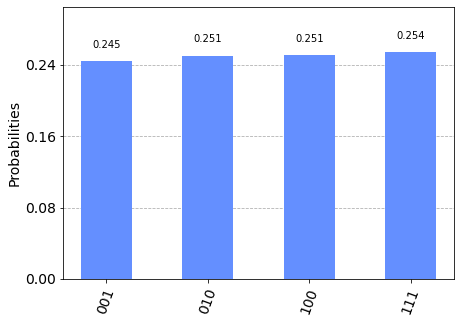

In [4]:
plot_histogram(counts)

In [5]:
########Just for testing
counts = result.get_memory(compiled_circuit)
round_1=[]
for i in counts:
    a=int(i[0])^int(i[1])
    round_1.append(a)
#print(round_1)

In [6]:
###This is for 010 corr to 10
####This circuit measure the GHZ state in y-basis
####Measurement done in y-basis if the input is 1

circuit2=QuantumCircuit(3,3)

###Initialize the in zero Q-State
circuit2.reset(0)
circuit2.reset(1)
circuit2.reset(2)

#########Following build are 
# Add a H gate on qubit 0
circuit2.h(0)

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit2.cx(0, 1)
circuit2.cx(0,2)

for i in np.arange(3):
    circuit2.barrier(i) 
    
# Map the quantum measurement to the classical bits
for i in np.arange(3):
    ##This parts does the measurment in y-basis
    if i != 1:
        circuit2.sdg(i)
    circuit2.h(i)
    circuit2.measure(i,i)
    
# compile the circuit down to low-level QASM instructions
# supported by the backend (not needed for simple circuits)
compiled_circuit2 = transpile(circuit2, simulator)

# Execute the circuit on the qasm simulator
job = simulator.run(compiled_circuit2, shots=10000,memory=True)

# Grab results from the job
result = job.result()

# Returns counts

counts2 = result.get_counts(compiled_circuit2)
#counts2=result.get_memory(compiled_circuit2)
#counts2=np.array(result.get_memory(compiled_circuit2))
print("\nTotal count for 00 and 11 are:",counts2)


# Draw the circuit
circuit2.draw()


Total count for 00 and 11 are: {'111': 2434, '010': 2536, '100': 2543, '001': 2487}


┌───┐           ░ ┌─────┐┌───┐     ┌─┐   
q_0: ─|0>─┤ H ├──■────■───░─┤ Sdg ├┤ H ├─────┤M├───
          └───┘┌─┴─┐  │   ░ └┬───┬┘└┬─┬┘     └╥┘   
q_1: ─|0>──────┤ X ├──┼───░──┤ H ├──┤M├───────╫────
               └───┘┌─┴─┐ ░ ┌┴───┴┐ └╥┘ ┌───┐ ║ ┌─┐
q_2: ─|0>───────────┤ X ├─░─┤ Sdg ├──╫──┤ H ├─╫─┤M├
                    └───┘ ░ └─────┘  ║  └───┘ ║ └╥┘
c: 3/════════════════════════════════╩════════╩══╩═
                                     1        0  2

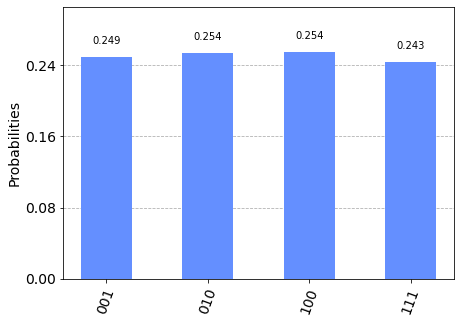

In [7]:
plot_histogram(counts2)

In [6]:
###This is for 100 corr to 00
####This circuit measure the GHZ state in y-basis
####Measurement done in y-basis if the input is 1

circuit3=QuantumCircuit(3,3)

###Initialize the in zero Q-State
circuit3.reset(0)
circuit3.reset(1)
circuit3.reset(2)

#########Following build are 
# Add a H gate on qubit 0
circuit3.h(0)

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit3.cx(0, 1)
circuit3.cx(0,2)

for i in np.arange(3):
    circuit3.barrier(i)

# Map the quantum measurement to the classical bits
for i in np.arange(3):
    ##This parts does the measurment in y-basis
    
    
    if i != 0:
        circuit3.sdg(i)
    circuit3.h(i)
    circuit3.measure(i,i)
    
# compile the circuit down to low-level QASM instructions
# supported by the backend (not needed for simple circuits)
compiled_circuit3 = transpile(circuit3, simulator)

# Execute the circuit on the qasm simulator
job = simulator.run(compiled_circuit3, shots=10000,memory=True)

# Grab results from the job
result = job.result()

# Returns counts

counts3 = result.get_counts(compiled_circuit3)
#counts2=result.get_memory(compiled_circuit2)
#counts2=np.array(result.get_memory(compiled_circuit2))
print("\nTotal count for 00 and 11 are:",counts3)


# Draw the circuit
circuit3.draw()


Total count for 00 and 11 are: {'001': 2475, '111': 2421, '100': 2540, '010': 2564}


┌───┐           ░  ┌───┐      ┌─┐      
q_0: ─|0>─┤ H ├──■────■───░──┤ H ├──────┤M├──────
          └───┘┌─┴─┐  │   ░ ┌┴───┴┐┌───┐└╥┘┌─┐   
q_1: ─|0>──────┤ X ├──┼───░─┤ Sdg ├┤ H ├─╫─┤M├───
               └───┘┌─┴─┐ ░ ├─────┤├───┤ ║ └╥┘┌─┐
q_2: ─|0>───────────┤ X ├─░─┤ Sdg ├┤ H ├─╫──╫─┤M├
                    └───┘ ░ └─────┘└───┘ ║  ║ └╥┘
c: 3/════════════════════════════════════╩══╩══╩═
                                         0  1  2

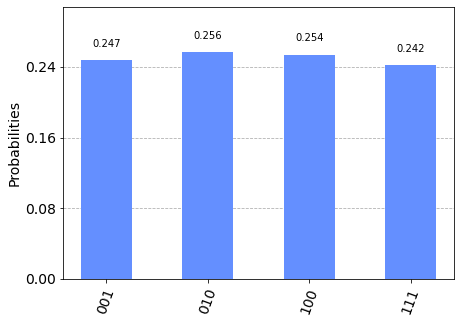

In [7]:
plot_histogram(counts3)

In [10]:
###This is for 111 corr to 11
####This circuit measure the GHZ state in y-basis
####Measurement done in y-basis if the input is 1

circuit4=QuantumCircuit(3,3)

###Initialize the in zero Q-State
circuit4.reset(0)
circuit4.reset(1)
circuit4.reset(2)

#########Following build are 
# Add a H gate on qubit 0
circuit4.h(0)

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit4.cx(0, 1)
circuit4.cx(0,2)
#circuit4.sdg(1)
#circuit4.sdg(2)



for i in np.arange(3):
    circuit4.barrier(i)
    
# Map the quantum measurement to the classical bits
for i in np.arange(3):
    ##This parts does the measurment in y-basis
    #circuit4.sdg(i)
    circuit4.h(i)
    circuit4.measure(i,i)
    
# compile the circuit down to low-level QASM instructions
# supported by the backend (not needed for simple circuits)
compiled_circuit4 = transpile(circuit4, simulator)

# Execute the circuit on the qasm simulator
job = simulator.run(compiled_circuit4, shots=10000,memory=True)

# Grab results from the job
result = job.result()

# Returns counts

counts4 = result.get_counts(compiled_circuit4)
#counts2=result.get_memory(compiled_circuit2)
#counts2=np.array(result.get_memory(compiled_circuit2))
print("\nTotal count for 00 and 11 are:",counts4)

#count
# Draw the circuit
circuit4.draw()


Total count for 00 and 11 are: {'011': 2528, '101': 2518, '110': 2511, '000': 2443}


┌───┐           ░ ┌───┐   ┌─┐   
q_0: ─|0>─┤ H ├──■────■───░─┤ H ├───┤M├───
          └───┘┌─┴─┐  │   ░ ├───┤┌─┐└╥┘   
q_1: ─|0>──────┤ X ├──┼───░─┤ H ├┤M├─╫────
               └───┘┌─┴─┐ ░ ├───┤└╥┘ ║ ┌─┐
q_2: ─|0>───────────┤ X ├─░─┤ H ├─╫──╫─┤M├
                    └───┘ ░ └───┘ ║  ║ └╥┘
c: 3/═════════════════════════════╩══╩══╩═
                                  1  0  2

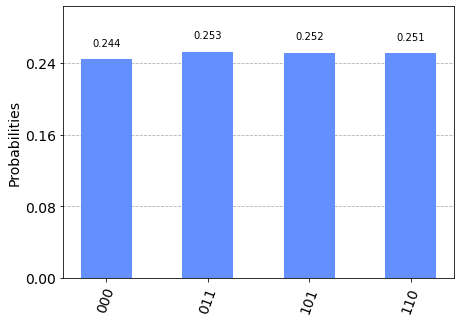

In [11]:
plot_histogram(counts4)

In [12]:
###########This part takes RAW data and feeds it to round 1
bit_len=8

input_=[0,0,1,1,1,1,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0] ##Say this is RAW data
###I will modify above to read input from file, this is just for trial.
length=np.floor(len(input_)/bit_len)
print(length)

for i in np.arange(length):
    ####This part divides data into 8-bit groups
    n=int(bit_len*i)
    n_=int(bit_len*(i+1))
    byte=np.array(input_[n:n_])
    #print(byte)
    A=[]
    B=[]
    for k in np.arange(bit_len/2):
        ind=int(2*k)
        ind_=int(2*(k+1))
        sub_bit=np.array(byte[ind:ind_])
        #print(sub_bit)
        
        
        if np.array_equal(sub_bit,np.array([0,1])):
            ###Take setting 001
            job=simulator.run(compiled_circuit,shots=1,memory=True)
            result=job.result()
            rez=result.get_memory(compiled_circuit)
            A.append(int(rez[0][0]))
            B.append(int(rez[0][1]))
            
        if np.array_equal(sub_bit,np.array([1,0])):
            ###Take setting 010
            job=simulator.run(compiled_circuit2,shots=1,memory=True)
            result=job.result()
            rez=result.get_memory(compiled_circuit2)
            A.append(int(rez[0][0]))
            B.append(int(rez[0][1]))
            
        if np.array_equal(sub_bit,np.array([0,0])):
            ###Take setting 100
            job=simulator.run(compiled_circuit3,shots=1,memory=True)
            result=job.result()
            rez=result.get_memory(compiled_circuit3)
            A.append(int(rez[0][0]))
            B.append(int(rez[0][1]))
            
        if np.array_equal(sub_bit,np.array([1,1])):
            ###Take setting 111
            job=simulator.run(compiled_circuit4,shots=3,memory=True)
            result=job.result()
            rez=result.get_memory(compiled_circuit4)
            A.append(int(rez[0][0]))
            B.append(int(rez[0][1]))
    print(A,B)

2.0
[0, 0, 1, 1] [1, 1, 0, 0]
[1, 1, 1, 0] [0, 0, 1, 0]


In [100]:
B=['101']
print(B[0][0])

1
